[View in Colaboratory](https://colab.research.google.com/github/akamloo/ML-Practice/blob/master/K_Means_Clustering_from_scratch_(week_2).ipynb)

In [0]:
### Objective: Implement K-means Clustering to detect network intrusion attempts (i.e. detecting DDoS attacks)
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation

In [48]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [0]:
# File contains: for each user, how many packets are sent per second and what's size of the packet
# Anomalies (DDoS attempts) will have lots of big packets in very short amount of time

def load_dataset(name):
  return np.loadtxt(name)

In [0]:
#Euclidian distance between two instances

def euclidian(a, b):
  return np.linalg.norm(a-b)

In [51]:
!ls 'gdrive/My Drive/Colab Notebooks/'

 durudataset.txt
 Gender.ipynb
'Google Dopamine RL.ipynb'
'Gradient Descent.ipynb'
'!~~~.ipynb'
'K-Means Clustering from scratch (week 2).ipynb'
'Logistic Regression (Iris) with tuning parameter understanding (Week 2).ipynb'
'Logistic Regression (Week 2).ipynb'
 OpenAIGYM.ipynb
'Spam Mail.ipynb'
'Support Vector Machine (SVM) Algorithm.ipynb'
 Untitled0.ipynb
 Untitled1.ipynb
 Untitled2.ipynb


Inputs:

1.   k : number of clusters to be implement
2.   epsilon : The minimum error to be used to calculate the distance
3.   distance : Name of the method to calculate the distance between the instances

Output:

1.   The centroids
2.   Evolution history of centroid
3.   Each instance with its perspective centroid 




In [0]:
def kmeans(k, epsilon = 0, distance = 'euclidian'):
  history_centroid = []
  
  if distance == 'euclidian':
    dist_method = euclidian
    
  dataset = load_dataset('/content/gdrive/My Drive/Colab Notebooks/durudataset.txt')
  print("Dataset has been loaded")
  num_instances, num_features = dataset.shape
  
  prototypes = dataset[np.random.randint(1, num_instances - 1, size = k)]  #Define k-centroids, they choosen randonly from dataset
  
  history_centroid.append(prototypes)  #Keep a log for cetroid values in order to visualize later in graphs
  
  prototypes_old = np.zeros(prototypes.shape)  #To keep track of centroids every iteration
  
  norm_centroid = dist_method(prototypes, prototypes_old)
  
  belongs_to = np.zeros((num_instances, 1))  #To store the instance values with there perticular cluster
  
  iteration = 0
  
  while norm_centroid > epsilon:
    iteration += 1
    
    norm_centroid = dist_method(prototypes, prototypes_old)
    
    prototypes_old = prototypes
    
    for index_instance, instance in enumerate(dataset):  #For each instance in the dataset (i.e. for all Xi values)
      
      dist_vector = np.zeros((k, 1))  #Define a distance vector of size k (i.e. number of cluster) to store the distance between instance and each cluster
      
      for index_centroid, centroid in enumerate(prototypes):  #For each centroid
        
        dist_vector[index_centroid] = dist_method(centroid, instance)  #Compute the distance between x and centroid
        
      belongs_to[index_instance, 0] = np.argmin(dist_vector)  #Assign the instance to the closest cluster
      
      
    temp_prototypes = np.zeros((k, num_features))
    
    for index in range(len(prototypes)):  #To calculate new centroid, for each centroid (k)
      
      instances_close = [i for i in range(len(belongs_to)) if belongs_to[i] == index]  #Get all the instances assigned to that perticular cluster
      
      prototype = np.mean(dataset[instances_close], axis = 0)  # Finding the new centroid by computing the mean of all instances of that centroid
      
      temp_prototypes[index, :] = prototype  #add our new centroid to our new centroid list
      
    prototypes = temp_prototypes
    
    history_centroid.append(temp_prototypes)
    
  return prototypes, history_centroid, belongs_to

In [0]:
# Lets design a function that plots centroid and there instances
def plot(dataset, history_centroid, belongs_to):
  colors = ['r', 'g']
  
  fig, ax = plt.subplots()
  
  for index in range(dataset.shape[0]):
    instances_close = [i for i in range(len(belongs_to)) if belongs_to[i] == index]
    
    for instance_index in instances_close:
      ax.plot(dataset[instance_index][0], dataset[instance_index][1], (colors[index] + 'o'))
      
  history_points = []
  plt.xlabel('Packet Send/Sec')
  plt.ylabel('Size of Packet')
  for index, centroid in enumerate(history_centroid):
    for inner, item in enumerate(centroid):
      if index == 0:
        history_points.append(ax.plot(item[0], item[1], 'bo')[0])
      else:
        history_points[inner].set_data(item[0], item[1])
        print("Centroid {} {}".format(index, item))
        plt.show()

Dataset has been loaded
Centroid 1 [0.22331067 0.28960446]


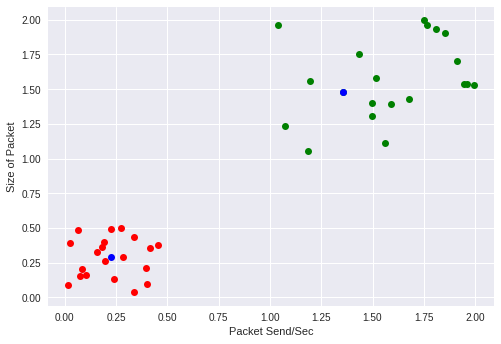

Centroid 1 [1.58058247 1.56897412]
Centroid 2 [0.22331067 0.28960446]
Centroid 2 [1.58058247 1.56897412]
Centroid 3 [0.22331067 0.28960446]
Centroid 3 [1.58058247 1.56897412]


In [62]:
dataset = load_dataset('/content/gdrive/My Drive/Colab Notebooks/durudataset.txt')
centroid, history_centroids, belongs_to = kmeans(2)
plot(dataset, history_centroids, belongs_to)